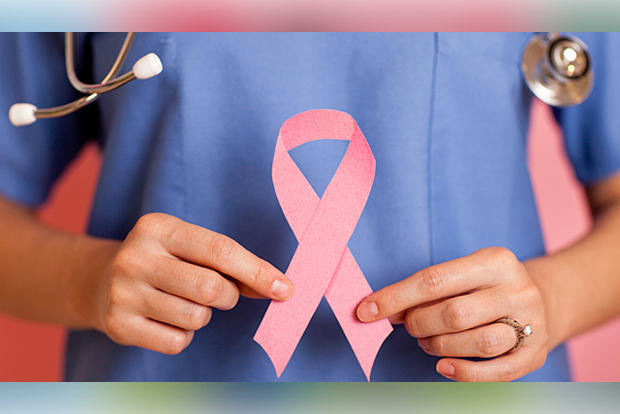
# K-Nearest Neighbors Breast Cancer Prediction Project

Lab created starting from https://solegaonkar.github.io/SktlearnKnn.html

Breast cancer is the most common cancer that ails women, except for skin cancers. Currently, the average risk of a woman (in the United States) developing breast cancer at a time in her life is about 12%. 


The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.

Before we get into this, there's an article that provides a good overview of the methodology behind what we'll be working on at https://towardsdatascience.com/knn-in-python-835643e2fb53

In [1]:
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
plt.style.use('ggplot')

In [2]:
breast_cancer_data = datasets.load_breast_cancer()
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
x = df
df['target'] = pd.Series(breast_cancer_data.target)
y = df['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Let's look at a few random rows of the data.

In [3]:
df[20:25]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,1
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,19.08,125.10,980.9,0.1390,0.5954,0.63050,0.23930,0.4667,0.09946,0
23,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,...,35.59,188.00,2615.0,0.1401,0.2600,0.31550,0.20090,0.2822,0.07526,0
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564,0


Let's see what these numbers represent.

In [4]:
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


All of these are the data our model will be using to learn.

What are we trying to classify then? Is our first data point benign or malignant?

In [5]:
#Getting the labels associated with the data. These are data points that we have as represented by either a 1 (malignant) or 0 (benign)
print(df.target.head(5))

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


From what we can see here, the first data point 0 is benign, so we can infer that the tumor that is represented here is not currently harmful.

**Splitting the data**

We have our data but we need to group them into training and validation sets. Thankfully, sklean has a function that does that easily.

The training data is th one we will fit into the model, while the validation data is the one with which we will test the accuracy of our model. It will help us adjust the hyperparameters and help overfitting or underfitting. 

In [6]:
#Importing the function for data splitting
from sklearn.model_selection import train_test_split

The train_test_split function takes four parameters: 

* the data we want to split (breast_cancer_data.data)
* the labels assocaited with this data (breast_cancer_data.target)
* the test size, which is the percentsge of data we want in our training set, expressed as a decimal (let's use test_size = 0.2) 
* the random state which ensures our data is split the same way, no matter how many times we run our code (let's use random_state = 100).

In [7]:
train_test_split(x, y, test_size = 0.2, random_state = 100)

[     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 58        13.050         19.31           82.61      527.2          0.08060   
 554       12.880         28.92           82.50      514.3          0.08123   
 351       15.750         19.22          107.10      758.6          0.12430   
 136       11.710         16.67           74.72      423.6          0.10510   
 497       12.470         17.31           80.45      480.1          0.08928   
 ..           ...           ...             ...        ...              ...   
 526       13.460         18.75           87.44      551.1          0.10750   
 53        18.220         18.70          120.30     1033.0          0.11480   
 350       11.660         17.07           73.70      421.0          0.07561   
 79        12.860         18.00           83.19      506.3          0.09934   
 520        9.295         13.90           59.96      257.8          0.13710   
 
      mean compactness  mean concavity  mean conca

Now, we have four arrays that represent:

* the training set
* the validation set
* the training labels
* the validation labels

We will store all these below:

In [8]:
training_data, validation_data, training_labels, validation_labels = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 100
    )

To confirm if all works good, let's compare the lengths of our training data and training label (they should be the same).

In [9]:
print(len(training_data))
print(len(training_labels))

455
455


**Creating our K Nearest Neighbors Classifier model**

Importing the kNN classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Create the classifier with three neighbors

In [11]:
classifier = KNeighborsClassifier(n_neighbors= 3)

Training the classifier with the training data

In [12]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

Now that we have a classifier model, how accurate is it on our validation data?

We can find out by using the score function which takes two parameters:
* the validation data
* the validation label



In [13]:
#Checking the accuracy of our KNN model
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


This shows that when we have 3 neighbors, our model's accuracy is about 95%.

There is a common issue in machine learning called overfitting. We will explore this more later in this unit. Let's check how the prediction would have done if we tested it on the training set rather than the validation set. If it does much better on the validation set, the algorithm is biased and we have a problem.

In [14]:
print(classifier.score(training_data, training_labels))

0.9560439560439561


Looks consistent to me.

Can we get a higher accuracy? What if we changed the value of neighbors? On one hand, incorporating more data would seem advisable. On the other hand, if we incorporate too many data points, we may lose some of the key information provided by the neighboring data points.

To examine this, we will create a loop that explores how how model performs when the number of neighbors increases from 1 all the way to 50.

In [15]:
#Creating a loop for more neighbours, where number of neighbours = k
for k in range(1, 51):
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(training_data, training_labels)
    print(classifier.score(validation_data, validation_labels))

0.9298245614035088
0.9385964912280702
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9649122807017544
0.9649122807017544
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.956140350877193
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193


So, the figures above represent the difference in accuracy for our model when number of neighbours is 1 through 50. This list is pretty long and it's a tad difficult to see at a glance what the highest values are. We don't want k to be unrealistically high or too low, so we'll visualize the data with a graph.

In [16]:
#Importing matplotlib for visualization
import matplotlib.pyplot as plt

In [17]:
#the y axis will embody all the accuracies we got, we'll call it accuracies
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

#the x axis will represent the number of neighbours, which we'll call k_list
k_list = range(1, 101)
print(accuracies)
   

[0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684

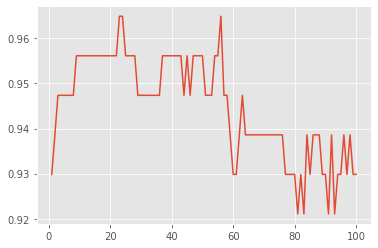

In [18]:
#Plotting our graph
plt.plot(k_list, accuracies)
plt.show()

Here, we can see the various accuracies at each value of k. Accuracy is pretty low when the number of neighbors is around 80 - 82 and 90 - 92, but is high around 20 and 58 ish. These may be considered as examples of overfitting (this happens when you train your statistical model with too much data, so it starts to learn from irrelevant data) and underfitting (this happens when you don't feed the model enough data, so your statistical model doesn't have enough data to work from.) 

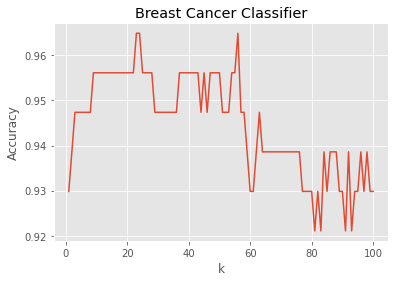

In [19]:
#Labelling the graph
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Breast Cancer Classifier')
plt.show


plt.plot(k_list, accuracies)

How do we know that the data points that we tested on are representative of the entire dataset? Perhaps we trained the dataset on a good variety of data, and tested it on the "easy" data points. This is where cross validation comes into play. In the graphic below, think of us creating a model 5 different times, each time using a different 80% of the dataset to train the model, and 20% of the dataset to test the model. This ensures that we eliminate the bias proposed about testing on the "easy" data.

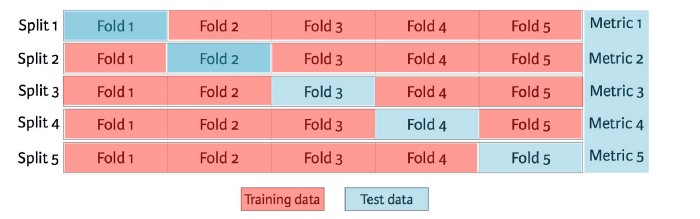

Create a new KNN model

In [20]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

Train model with cv of 5

In [21]:
cv_scores = cross_val_score(knn_cv, breast_cancer_data.data, breast_cancer_data.target, cv=5)

Print each cv score (accuracy) and average them

In [22]:
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]
cv_scores mean:0.9191429902189101


We see that there's quite a variety of accuracies when using different test/training data splits. To be fair, this is mostly because we're using such a small number of neighbors to determine the label of a data point.

## Task 1:

Testing each value for numbers of neighbors from 1 to 100, with cross-validation values of 5 and then 10 (200 simulations total), find the maximum mean cv_score out of all these scenarios.

You could do this with loops if desired, or we could automate this using parameter hypertuning and GridSearchCV to do this like at https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid)
knn_cv.fit(x,y)

cv_scores2 = cross_val_score(knn_cv, breast_cancer_data.data, breast_cancer_data.target, cv=5)
cv_scores3 = cross_val_score(knn_cv, breast_cancer_data.data, breast_cancer_data.target, cv=10)
cv_scores4 = list(cv_scores2) + list(cv_scores3)
print(cv_scores4)
print(max(cv_scores4))
   

## Task 2:

Download the diabetes dataset from https://www.kaggle.com/uciml/pima-indians-diabetes-database. Recreate the sequence above to perform kNN modeling on the dataset. You can leave out the text. 

One issue we did not address above is that some values have a much greater magnitude than others. Perhaps we should normalize the data. Check out the discussion on StandardScaler at https://towardsdatascience.com/knn-in-python-835643e2fb53 and incorporate this into your code. I'd recommend getting everything working first and then go back and incorporate the normalized values.

In [31]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df
y = df['Outcome']
df.head()

training_data, validation_data, training_labels, validation_labels = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 100
    )

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,5)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid)
knn_cv.fit(x,y)

cv_scores5 = cross_val_score(knn_cv, x, y, cv=5)
cv_scores6 = cross_val_score(knn_cv, x, y, cv=10)
cv_scores7 = list(cv_scores5) + list(cv_scores6)
print(cv_scores7)
print(max(cv_scores7))